In [2]:
import pandas as pd
median_house_hold_in_come = pd.read_csv('MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")


In [2]:
median_house_hold_in_come.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [3]:
median_house_hold_in_come['Median Income'].interpolate(method='polynomial',order=2, axis=0, inplace=True)


In [4]:
median_house_hold_in_come.replace(['(X)','-', '2,500-',"250,000+"], value='0', inplace=True)

In [5]:

median_house_hold_in_come['Median Income']=pd.to_numeric(median_house_hold_in_come['Median Income'])

# poverty rate and household income by region


In [6]:
median_house_hold_in_come.loc[44]

Geographic Area             AL
City               Benton town
Median Income              0.0
Name: 44, dtype: object

In [7]:
c=median_house_hold_in_come.groupby('Geographic Area')['Median Income'].mean().sort_values(ascending=True)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

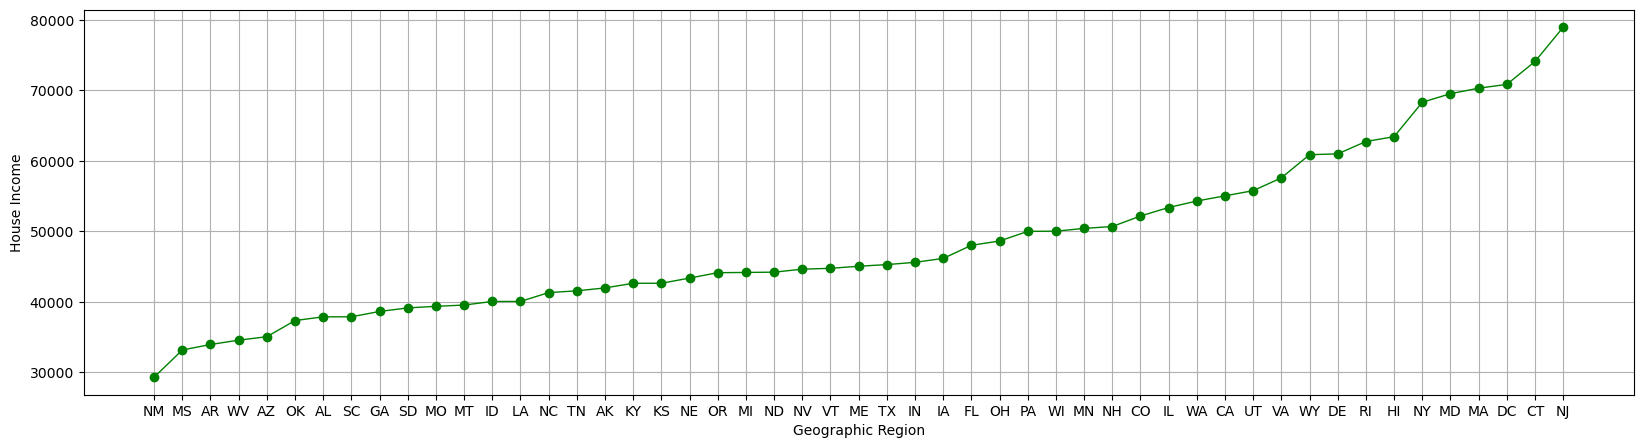

In [9]:
fig=plt.figure(figsize=(20,5))
plt.plot(c, linewidth=1.0, linestyle='solid', color='g', marker='o')
plt.xlabel('Geographic Region')
plt.ylabel('House Income')
plt.grid(True)

In [26]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [27]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [28]:
percentage_people_below_poverty_level.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [29]:
percentage_people_below_poverty_level.replace(["-"],None, inplace=True)

In [30]:
percentage_people_below_poverty_level['poverty_rate']=pd.to_numeric(percentage_people_below_poverty_level['poverty_rate'])

In [31]:
percentage_people_below_poverty_level.interpolate(method='polynomial', order=3, inplace=True)

In [32]:
a=percentage_people_below_poverty_level.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=True).reset_index()[:15]
a

,Geographic Area,poverty_rate
0,NJ,8.201582
1,CT,9.137500
2,MA,9.563749
3,WY,9.839635
4,MD,10.312830
5,RI,10.369444
6,NY,11.666524
7,ND,12.148672
8,UT,12.203865
9,IA,12.272023


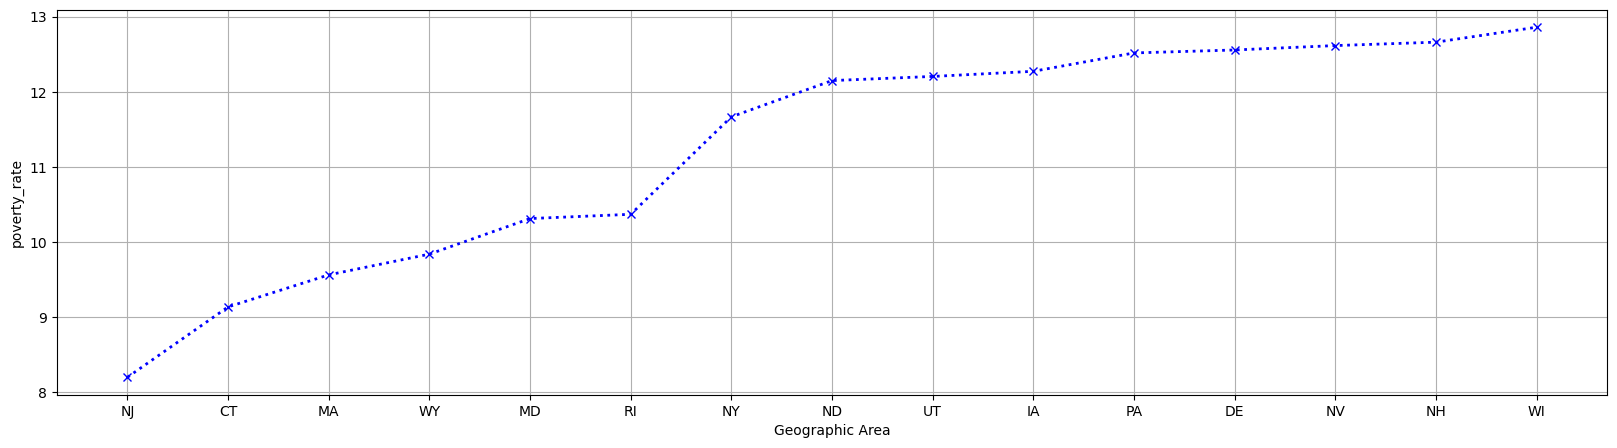

In [33]:
fig=plt.figure(figsize=(20,5))
plt.plot(a['Geographic Area'],a['poverty_rate'], linewidth=2.0, linestyle=':', color='b', marker='x')
plt.xlabel('Geographic Area')
plt.ylabel('poverty_rate')
plt.grid(True)

# High school graduation rate vs Poverty rate of each state

In [34]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [35]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [36]:
percent_over_25_completed_highSchool.replace(['-'],None, inplace=True)

In [37]:
percent_over_25_completed_highSchool['percent_completed_hs']=percent_over_25_completed_highSchool['percent_completed_hs'].astype('float')

In [38]:
percent_over_25_completed_highSchool['percent_completed_hs'].interpolate(method='polynomial', order=3, inplace=True)

In [39]:
b=percent_over_25_completed_highSchool.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False).reset_index()[:15]


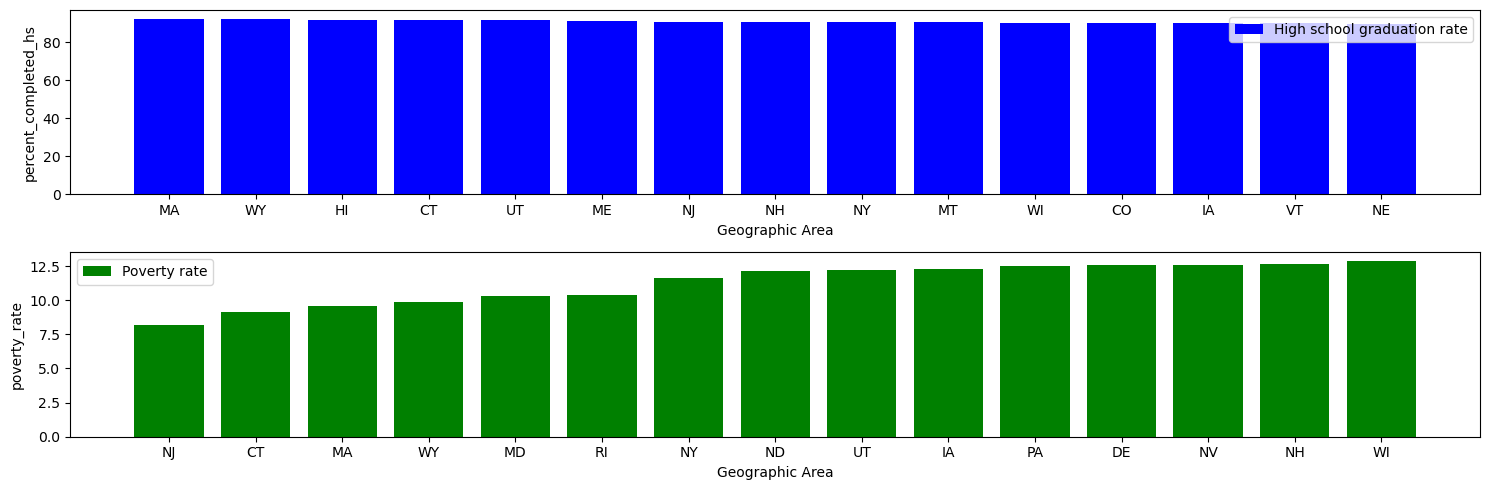

In [40]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,5))
ax1.bar(b['Geographic Area'],b['percent_completed_hs'],linestyle=':', color='b',label='High school graduation rate')
ax2.bar(a['Geographic Area'],a['poverty_rate'],linestyle='-', color='g',label='Poverty rate')
ax1.set_xlabel('Geographic Area')
ax1.set_ylabel('percent_completed_hs')
ax2.set_xlabel('Geographic Area')
ax2.set_ylabel('poverty_rate')
ax1.legend()
ax2.legend()
plt.tight_layout()

In [41]:
pv=percentage_people_below_poverty_level.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=True).reset_index()


In [42]:
ps=percent_over_25_completed_highSchool.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True).reset_index()

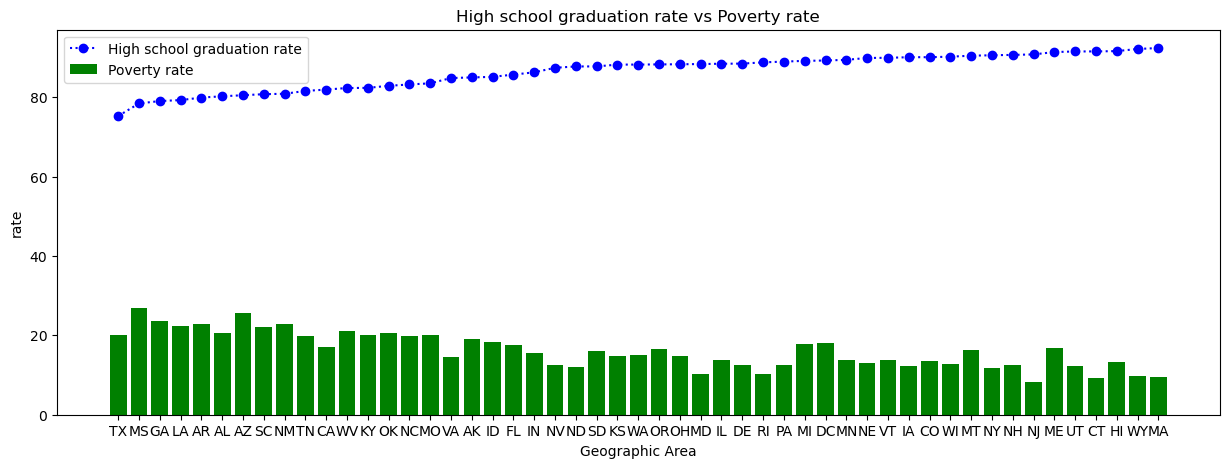

In [43]:
fig=plt.figure(figsize=(15,5))
plt.plot(ps['Geographic Area'],ps['percent_completed_hs'],linestyle=':', color='b',marker='o',label='High school graduation rate')
plt.bar(pv['Geographic Area'],pv['poverty_rate'],linestyle='-', color='g',label='Poverty rate')
plt.xlabel('Geographic Area')
plt.ylabel('rate')
plt.title('High school graduation rate vs Poverty rate')
plt.legend()

In [56]:
mer=pd.merge(percentage_people_below_poverty_level, percent_over_25_completed_highSchool, how='inner', left_on=['Geographic Area','City'], right_on=['Geographic Area','City'])
me_mean=mer.groupby('Geographic Area')[['poverty_rate','percent_completed_hs']].mean().sort_values(by='poverty_rate',ascending=True).reset_index()
me_mean

,Geographic Area,poverty_rate,percent_completed_hs
0,NJ,8.201582,90.831792
1,CT,9.137500,91.591667
2,MA,9.563749,92.436531
3,WY,9.839635,92.208394
4,MD,10.312830,88.404769
5,RI,10.369444,88.825000
6,NY,11.666524,90.622435
7,ND,12.148672,87.795670
8,UT,12.203865,91.578179
9,IA,12.272023,90.126867


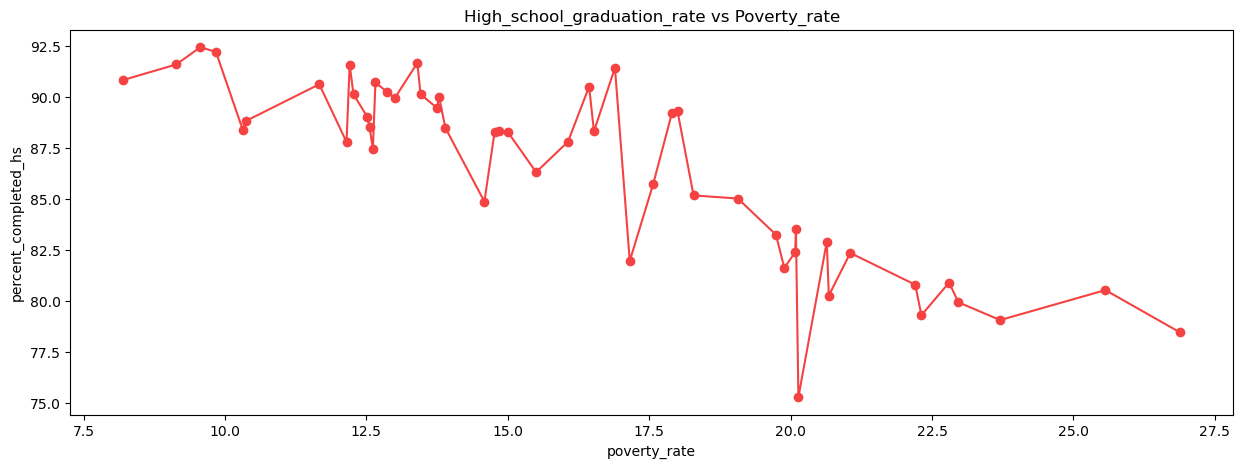

In [45]:
fig=plt.figure(figsize=(15,5))
plt.plot(me_mean['poverty_rate'], me_mean['percent_completed_hs'],linestyle='-', color='#f54242',marker='o')
plt.xlabel('poverty_rate')
plt.ylabel('percent_completed_hs')
plt.title('High_school_graduation_rate vs Poverty_rate')
plt.show()

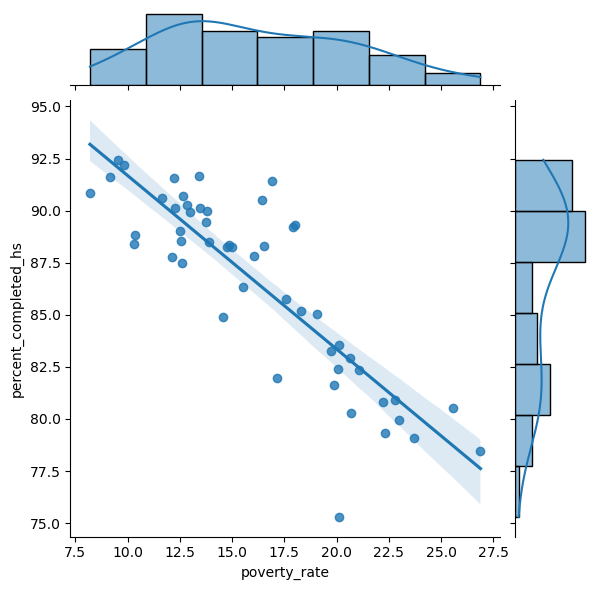

In [46]:
sns.jointplot(x='poverty_rate',y='percent_completed_hs', data=me_mean, kind='reg')


# Percentage of state's population according to races that are black,white,native american, asian and hispanic

In [31]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [32]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [33]:
share_race_city.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [34]:
share_race_city.replace(["(X)"], value=None, inplace=True)

In [35]:
share_race_city[["share_white","share_black","share_native_american","share_asian","share_hispanic"]]=share_race_city[["share_white","share_black","share_native_american","share_asian","share_hispanic"]].astype(float)

In [36]:
share_race_city.interpolate(method='polynomial', order=2, inplace=True)

In [37]:
sh=share_race_city.groupby('Geographic area')[["share_white","share_black","share_native_american","share_asian","share_hispanic"]].sum().reset_index()

In [38]:
sh['Total']=sh['share_white']+sh['share_black']+sh['share_native_american']+sh['share_asian']+sh['share_hispanic']

In [39]:
sh['p_share_white']=(sh['share_white']*100/sh['Total']).round(3)
sh['p_share_black']=(sh['share_black']*100/sh['Total']).round(3)
sh['p_share_native_american']=(sh['share_native_american']*100/sh['Total']).round(3)
sh['p_share_asian']=(sh['share_asian']*100/sh['Total']).round(3)
sh['p_share_hispanic']=(sh['share_hispanic']*100/sh['Total']).round(3)

In [40]:
sh=sh[0:15]

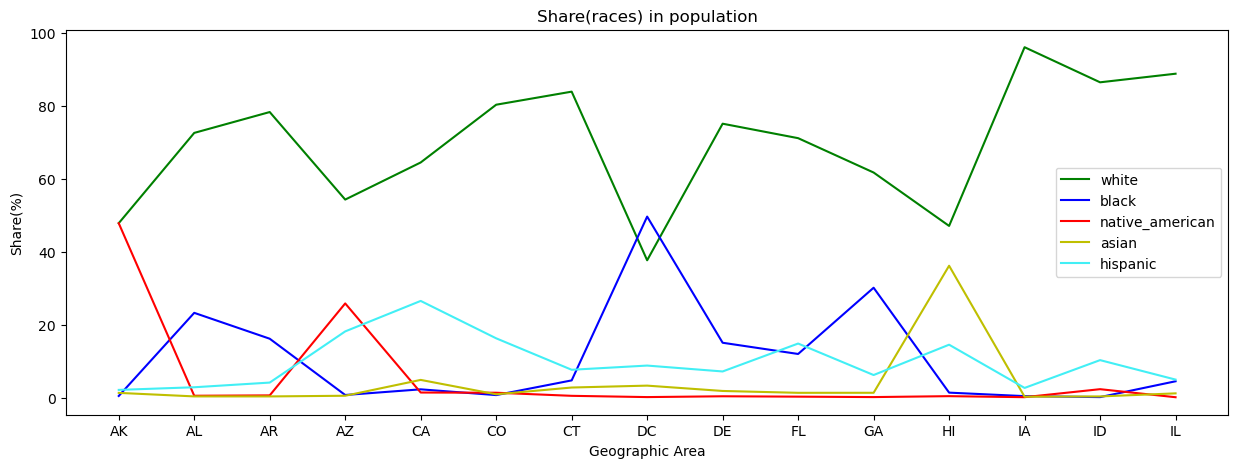

In [41]:
fig=plt.figure(figsize=(15,5))
plt.plot(sh['Geographic area'],sh['p_share_white'], color='g', linestyle='-', label='white' )
plt.plot(sh['Geographic area'],sh['p_share_black'], color='b', linestyle='-', label='black' )
plt.plot(sh['Geographic area'],sh['p_share_native_american'], color='r', linestyle='-', label='native_american' )
plt.plot(sh['Geographic area'],sh['p_share_asian'], color='y', linestyle='solid', label='asian' )
plt.plot(sh['Geographic area'],sh['p_share_hispanic'], color='#42eff5',linestyle='-', label='hispanic' )
plt.xlabel('Geographic Area')
plt.ylabel('Share(%)')
plt.title('Share(races) in population')
plt.legend()

# Number of deaths recorded in regions with low and high poverty rates

In [53]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   Geographic Area          2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [48]:
kill.rename(columns={'state':'Geographic Area'}, inplace=True)

In [97]:
new=pd.merge(kill,me_mean, on='Geographic Area', how='left')
new['lab']=''

In [105]:
new["poverty"]=["high" if i>20 else "low" if i<15 else "normal" for i in new["poverty_rate"]]
#for i in new['poverty_rate']: 
#    if i>=20.0:
#       new['lab']='High'
#   elif i>15.0 and i<20.0:
#       new['lab']='Normal'
#   elif i<=15.0:
#       new['lab']='low'

In [106]:
new[40:50]

,id,name,date,manner_of_death,armed,age,gender,race,city,Geographic Area,signs_of_mental_illness,threat_level,flee,body_camera,poverty_rate,percent_completed_hs,lab,poverty
40,75,Pablo Meza,17/01/15,shot,gun,24.0,M,H,Los Angeles,CA,False,attack,Not fleeing,False,17.155597,81.969236,low,normal
41,78,Daniel Brumley,17/01/15,shot,knife,27.0,M,H,Fort Worth,TX,False,attack,Not fleeing,False,20.136623,75.299805,low,high
42,80,Jonathan Guillory,18/01/15,shot,gun,32.0,M,W,Maricopa,AZ,True,attack,Not fleeing,False,25.563924,80.545555,low,high
43,83,Carter Castle,18/01/15,shot and Tasered,gun,67.0,M,W,Gunlock,KY,True,attack,Not fleeing,False,20.080000,82.402699,low,high
44,84,Paul Campbell,19/01/15,shot,knife,49.0,M,W,Weymouth,MA,False,attack,Not fleeing,False,9.563749,92.436531,low,low
45,85,Dewayne Carr,20/01/15,shot,vehicle,42.0,M,B,Scottsdale,AZ,False,other,Car,False,25.563924,80.545555,low,high
46,86,Todd Allen Hodge,21/01/15,shot,gun,36.0,M,W,Hemet,CA,False,attack,Not fleeing,False,17.155597,81.969236,low,normal
47,88,Miguel Angel de Santos-Rodriguez,21/01/15,shot,gun,36.0,M,H,Chapeno,TX,False,attack,Foot,False,20.136623,75.299805,low,high
48,90,Isaac Holmes,21/01/15,shot,gun,19.0,M,B,St. Louis,MO,False,attack,Not fleeing,False,20.093010,83.545864,low,high
49,98,Andrew Toto,21/01/15,shot,gun,54.0,M,W,Derry,NH,True,attack,Not fleeing,False,12.659794,90.711340,low,low


<Axes: xlabel='Geographic Area', ylabel='count'>

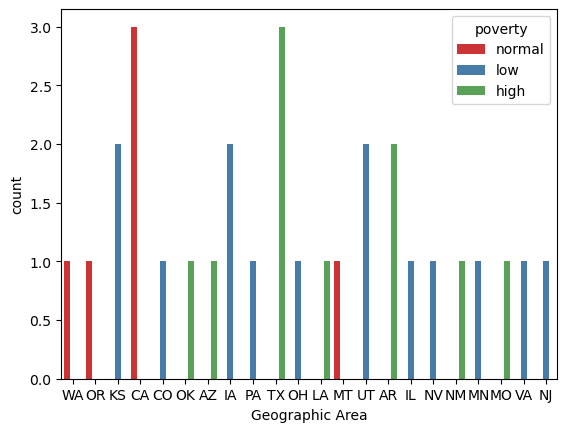

In [109]:
sns.countplot(x='Geographic Area', data=new[:30], hue='poverty',palette='Set1')

## Having mental illness or not:

In [3]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [4]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


<Axes: xlabel='signs_of_mental_illness', ylabel='count'>

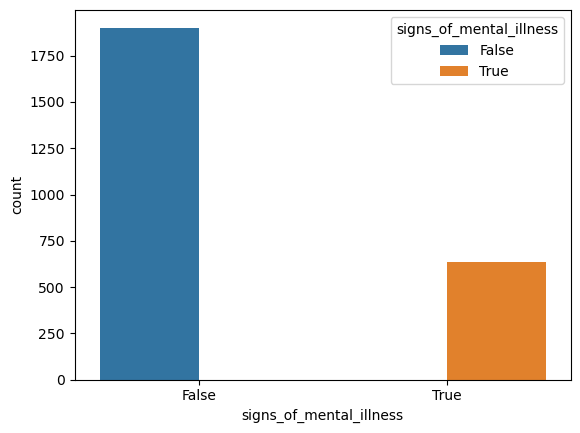

In [7]:
sns.countplot(x='signs_of_mental_illness', data=kill, hue='signs_of_mental_illness')

# Distribution of poverty rate according to psychological patient diagnosis:

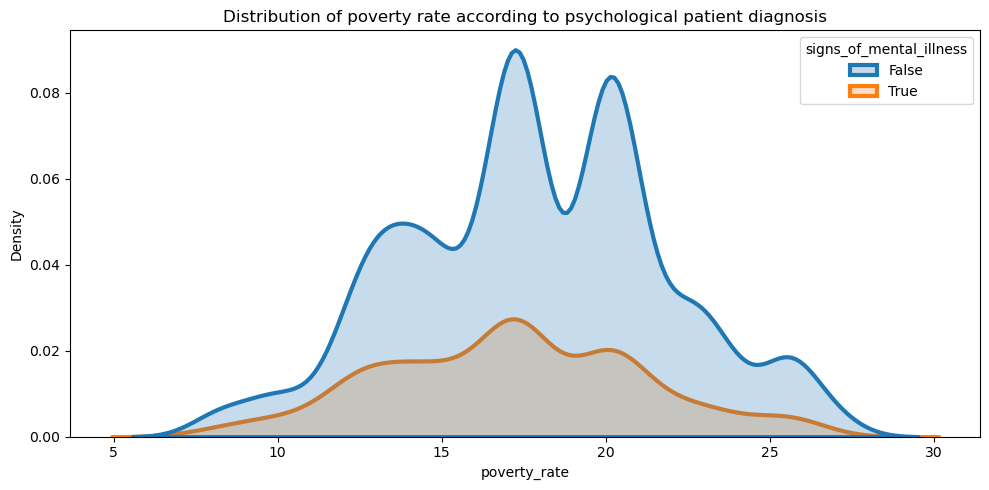

In [67]:
fig=plt.figure(figsize=(10,5))
sns.kdeplot(x='poverty_rate', data=new, hue='signs_of_mental_illness', fill=True, linewidth=3.0)
plt.title("Distribution of poverty rate according to psychological patient diagnosis")
plt.tight_layout()

# Most dangerous state:

In [74]:
dang=kill['Geographic Area'].value_counts().reset_index()
dang=dang.sort_values('count', ascending=False)

Text(0.5, 1.0, 'Most dangerous state')

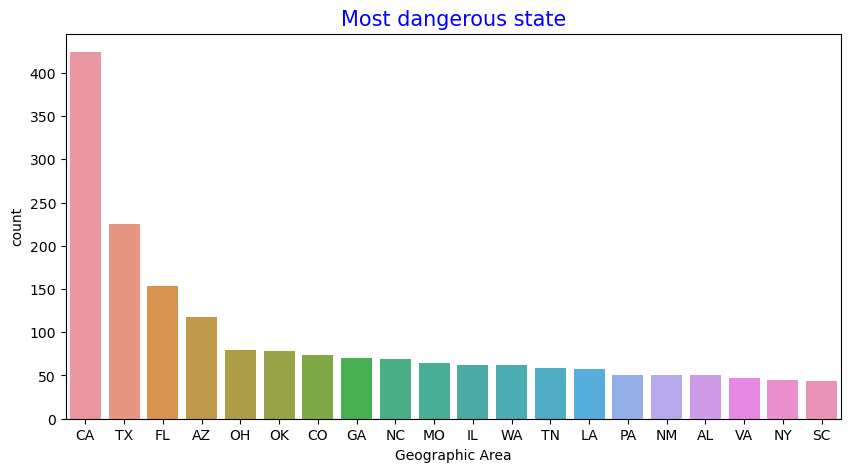

In [77]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='Geographic Area', y='count', data=dang[:20])
plt.title('Most dangerous state',color = 'blue',fontsize=15)

# Age distribution of the killed people according race:

Text(0.5, 1.0, 'Age distribution of the killed people according race')

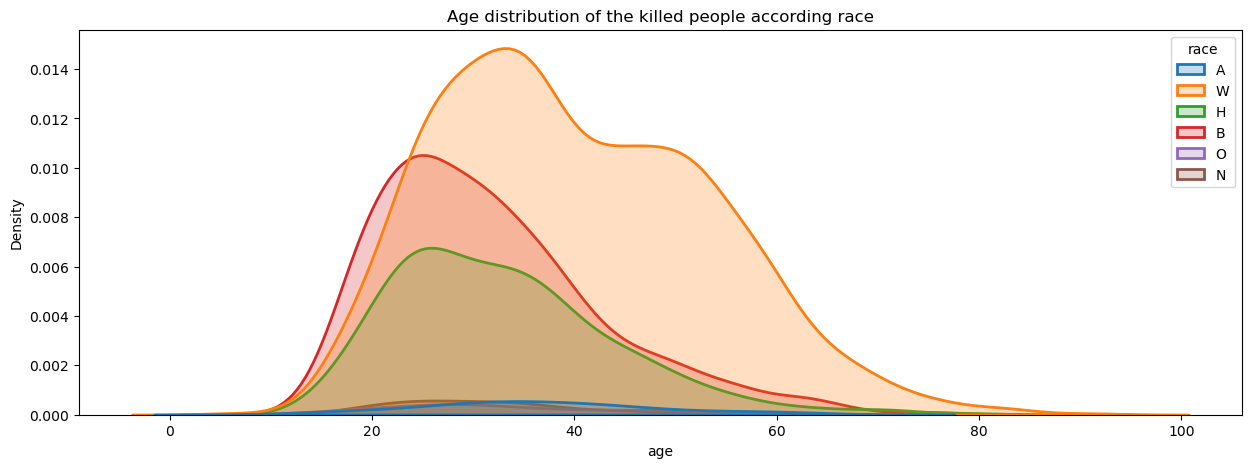

In [79]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=kill,x="age", hue="race", fill=True, linewidth=2)
plt.title("Age distribution of the killed people according race")

# Manner of death by age and gender 

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='gender', ylabel='age'>

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


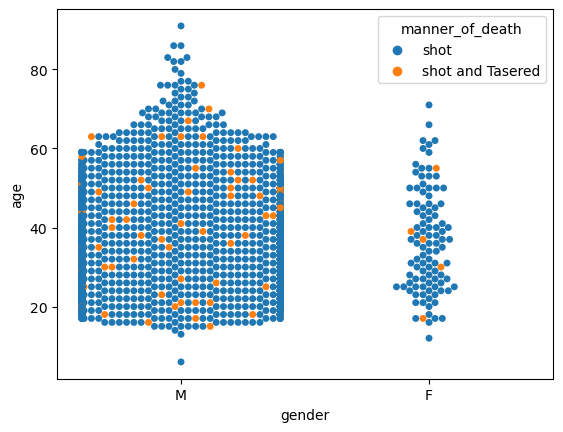

In [81]:
sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=kill)